In [1]:
import os
import pandas as pd
import numpy as np
import Sprayer_PDE as SP

t = 0
time_start = pd.Timestamp('2022-09-18 00:00:00')
print(str(time_start + pd.Timedelta(pd.offsets.Second(t*60))))


grid_x = grid_y = 20 # x,y coordinate range
#网格范围 0 ~ grid_x, 0 ~ grid_y

initial_field = 20 * np.ones((grid_x, grid_y))\
                    + 0 * np.random.random((grid_x, grid_y))# randomly initialize "initial_field" map matrix around 100
#初始污染物分布，每个网格为250m x 250m，污染源单位PM2.5

R = - 0.0* np.ones((grid_x, grid_y)) - 3 * np.ones((grid_x, grid_y)) + 6 * np.random.random((grid_x, grid_y)) # initialize pollution resource map matrix
# R = - 0.0 * np.ones((grid_x, grid_y))
R[10][10] = 60
R[16][16] = 60
# R[3][16] = 80
# R[16][3] = 80
R[3][3] = 60
#污染源分布R，每个网格为250m x 250m
    
data_sprayer_train = []
# time_range = 100
# data_sprayer_train.append(pd.DataFrame({"time":range(t , t + time_range,10), "x":np.linspace(0,grid_x-grid_x/10,10),\
#                                         "y":np.linspace(0,grid_y-grid_y/10,10), "spray_volume":[5000 for i in range(10)]}))
data_sprayer_train.append(pd.DataFrame())
# for i in range(20):
#     for j in range(1):
#         new_pd = pd.DataFrame({"time":i*5 + j, "x":i*grid_x/20,"y":i*grid_y/20, "spray_volume":200},index=[0])
#         data_sprayer_train[0] = pd.concat([data_sprayer_train[0],new_pd])

for i in range(20):
    for j in range(1):
        if i >= 10 and i <= 15:
            new_pd = pd.DataFrame({"time":i*5 + j, "x":10,"y":10, "spray_volume":200},index=[0])
            data_sprayer_train[0] = pd.concat([data_sprayer_train[0],new_pd])
        else:
            new_pd = pd.DataFrame({"time":i*5 + j, "x":10,"y":10, "spray_volume":0},index=[0])
            data_sprayer_train[0] = pd.concat([data_sprayer_train[0],new_pd])


#洒水车的轨迹和洒水量 (轨迹时间单位：min, 轨迹空间单位：百米（每个网格为250m x 250m）, 洒水量单位 L/min)
#每个洒水车对应一个data_sprayer_train[i]

model_test = SP.Diffusion_Model(x_range = grid_x, y_range = grid_y,\
                 initial_field = initial_field, R_field = R, data_sprayer_train = data_sprayer_train, t_start = 0) # build model
#x_range, y_range：空间网格大小
#initial_field：初始污染物分布，每个网格为100m x 100m，污染源单位PM2.5
#R_field：污染源分布R，每个网格为100m x 100m
#data_sprayer_train：每个洒水车对应一个data_sprayer_train[i]
#t_start：起始状态对应的时间，默认为0


2022-09-18 00:00:00


In [2]:
import time
data_show_matrix = []
time_count = time.time()
step = 10
env = initial_field
data_show_matrix.append(env)
for i in range(0,200,step):
    # if i > 49:
    #      R[10][10] = 5
    #      R[16][16] = 5
    # #     # R[3][16] = 180
    # #     # R[16][3] = 180
    #      R[3][3] = 5
    model_test = SP.Diffusion_Model(x_range = grid_x, y_range = grid_y,\
                 initial_field = env, R_field = R, data_sprayer_train = data_sprayer_train, t_start = 0 + i) # build model
    if i > 0 and i%10 == 0:
        data_show_matrix.append(env)
    env = model_test.solve(step)[-1]
    env = np.clip(env, 5, 5000)
    print("infer_time:%f"%(time.time() - time_count))
    time_count = time.time()
#分别推断10,20,30...的污染地图（单位：min）

100%|██████████| 1.0/1.0 [00:00<00:00,  1.51it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.10it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.45it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.10it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.54it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.68it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.24it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.52it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.69it/s]    


infer_time:2.148193


100%|██████████| 1.0/1.0 [00:00<00:00,  2.59it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.42it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.15it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.76it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.19it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.85it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.62it/s]    


infer_time:1.778103


100%|██████████| 1.0/1.0 [00:00<00:00,  2.27it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.52it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.95it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.46it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.73it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.85it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.24it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.80it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.99it/s]    


infer_time:1.812868


100%|██████████| 1.0/1.0 [00:00<00:00,  2.32it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.81it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.53it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.65it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.91it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.36it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.54it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.93it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.23it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.75it/s]    


infer_time:1.866687


100%|██████████| 1.0/1.0 [00:00<00:00,  2.57it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.36it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.93it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.31it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.08it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.80it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.44it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.98it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.99it/s]    


infer_time:1.731165


100%|██████████| 1.0/1.0 [00:00<00:00,  2.69it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.53it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.70it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.63it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.81it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.12it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.52it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.23it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.04it/s]    


infer_time:1.843225


100%|██████████| 1.0/1.0 [00:00<00:00,  2.24it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.15it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.58it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.71it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.14it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.48it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.05it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.46it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.91it/s]    


infer_time:1.821154


100%|██████████| 1.0/1.0 [00:00<00:00,  2.68it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.18it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.10it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.82it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.96it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.96it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.00it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.10it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.46it/s]    


infer_time:1.695497


100%|██████████| 1.0/1.0 [00:00<00:00,  2.68it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.72it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.96it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.00it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.33it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.81it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.38it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.80it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.33it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.65it/s]    


infer_time:1.779598


100%|██████████| 1.0/1.0 [00:00<00:00,  2.72it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.58it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.88it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.62it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.13it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.59it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.47it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.36it/s]    


infer_time:1.741187


100%|██████████| 1.0/1.0 [00:00<00:00,  2.29it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.72it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.84it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.97it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.94it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.29it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.16it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.26it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.98it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.58it/s]    


infer_time:1.755899


100%|██████████| 1.0/1.0 [00:00<00:00,  2.75it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.63it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.03it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  5.49it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.38it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.22it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.45it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.41it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.61it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.62it/s]    


infer_time:1.798987


100%|██████████| 1.0/1.0 [00:00<00:00,  2.61it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.33it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.28it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.20it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.22it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.43it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.88it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.04it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.57it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.76it/s]    


infer_time:1.705246


100%|██████████| 1.0/1.0 [00:00<00:00,  2.58it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.46it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.03it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.99it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.31it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.09it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.17it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.41it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.97it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.04it/s]    


infer_time:1.714035


100%|██████████| 1.0/1.0 [00:00<00:00,  2.22it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.06it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.24it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.55it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.90it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.36it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.51it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.78it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.93it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.52it/s]    


infer_time:1.834722


100%|██████████| 1.0/1.0 [00:00<00:00,  2.75it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.22it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.23it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.58it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.08it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.96it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.03it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.47it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.64it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.88it/s]    


infer_time:1.694032


100%|██████████| 1.0/1.0 [00:00<00:00,  2.69it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.31it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.13it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.36it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.14it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.76it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.84it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.89it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.27it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.49it/s]    


infer_time:1.683500


100%|██████████| 1.0/1.0 [00:00<00:00,  2.64it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.24it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.38it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.54it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.61it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.16it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  4.50it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.06it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.88it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.29it/s]    


infer_time:1.794395


100%|██████████| 1.0/1.0 [00:00<00:00,  2.77it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.26it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.61it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.06it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.09it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.14it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.16it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.11it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.55it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.82it/s]    


infer_time:1.676994


100%|██████████| 1.0/1.0 [00:00<00:00,  2.70it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.22it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.32it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.52it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.21it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.09it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.06it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.08it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  6.68it/s]    
100%|██████████| 1.0/1.0 [00:00<00:00,  7.01it/s]    

infer_time:1.682967


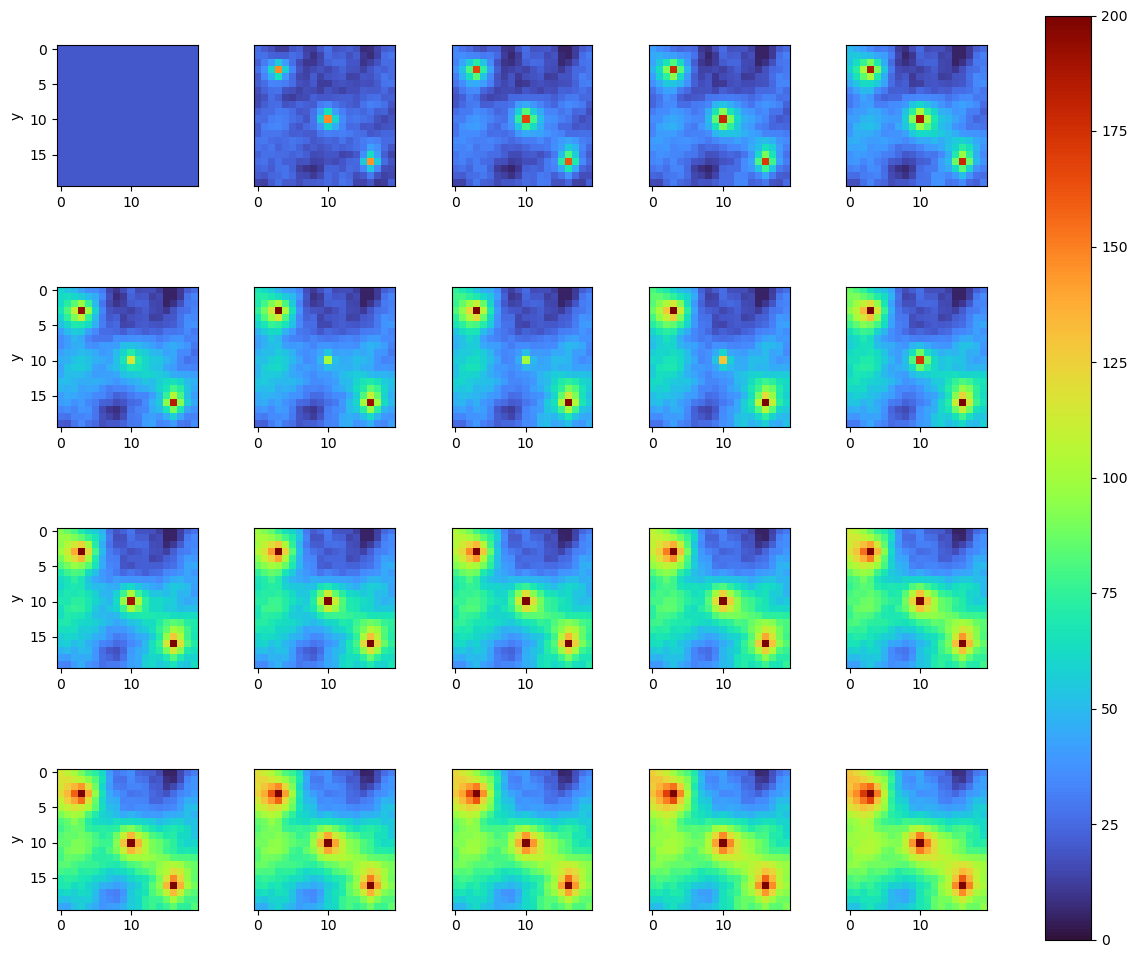

In [3]:
import matplotlib.pyplot as plt
show_range_z_score = 3
fig_size = 3
vmin = 0
vmax = 200
subfig_num = 20
test_show_row = 4
subfig_onerow = 5
fig, axes = plt.subplots(test_show_row, subfig_onerow, figsize=(fig_size * subfig_onerow, fig_size * test_show_row))
fig.subplots_adjust(wspace = 0.4, hspace = 0.2)
line_color = np.random.random(3)

for i in range(subfig_num):
    i_row = int(i / subfig_onerow)
    i_col = int(i % subfig_onerow)
#             ax = plt.subplot(test_show_row, subfig_onerow, i + 1, figsize=(10, 10))
    if i % subfig_onerow != 0:
        axes[i_row][i_col].yaxis.set_major_locator(plt.NullLocator())
    else:
        axes[i_row][i_col].set_ylabel("y")
    im = axes[i_row][i_col].imshow(np.matrix(data_show_matrix[i]).T, cmap='turbo',vmin = vmin, vmax = vmax)
fig.colorbar(im, ax=axes.ravel().tolist(), orientation="vertical")

#10,20,30...的污染地图的可视化（单位：min）

In [4]:
for a in range(5):
    for b in range(5):
        if a == 2 and b == 2:
            xx = 0
        elif (a - 2)**2 + (b - 2)**2 <= 2:
            print(a,b)
        else:
            xx =1

1 1
1 2
1 3
2 1
2 3
3 1
3 2
3 3
